# Initial Model #1
#### By: Group 1 - Anthony Chung, Andrew Tropeano, Russel Coonrod, Jihao Yang
- Table of content
- Reading in data
- Performing EDA
- Dealing with missing
- Dealing with outliers 
- Transforming variables
- Feature Select
- Perform Train_test_split on train data to model
- Stacking models and performing CV

### Above the Dataset
- This dataset is from kaggle.com: Competition House Prices: Advanced Regression Techniques 
- We are given a dataset that consist of 79 features that will help us predict the house prices of Ames, Iowa! Fun!
- The dataset consists of 81 attributes and 1460 observation

In [1]:
# import modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Read in data
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')
#Save Id of each column to a different df
train_id = df_train['Id']
test_id = df_test['Id']
#Dropping the test id for now
df_train.drop("Id", axis = 1, inplace = True)
df_test.drop("Id", axis = 1, inplace = True)
#Check the shape of training


#Getting test shape and train shape
ntrain =  df_train.shape[0]
ntest = df_test.shape[0]

#Train sale price
y_train = df_train['SalePrice'].values


#Concatenate the two dataset to form all data
all_data = pd.concat((df_train, df_test)).reset_index(drop=True)
all_data.drop(['SalePrice'], axis=1, inplace=True)

all_data.shape

(2919, 79)

In [3]:
df_test.shape

(1459, 79)

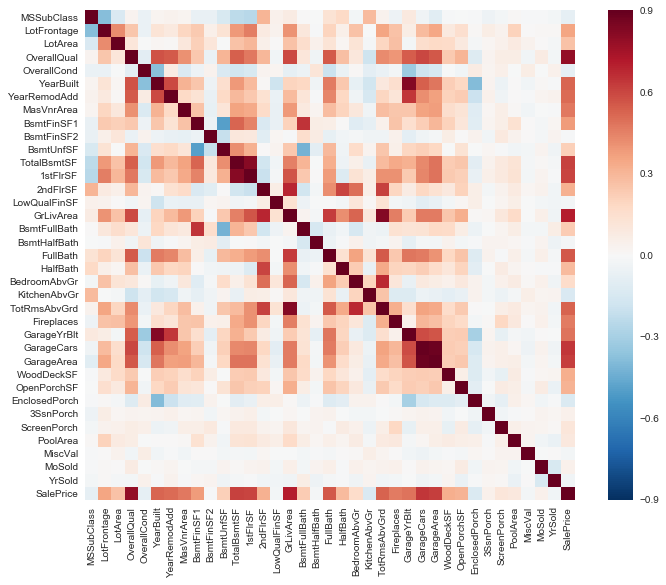

In [4]:
#Do a correlation analysis on the data to look at correlations
traincor = df_train.corr()
plt.subplots(figsize=(12,9))
sns.heatmap(traincor, vmax=0.9, square=True)
plt.show()

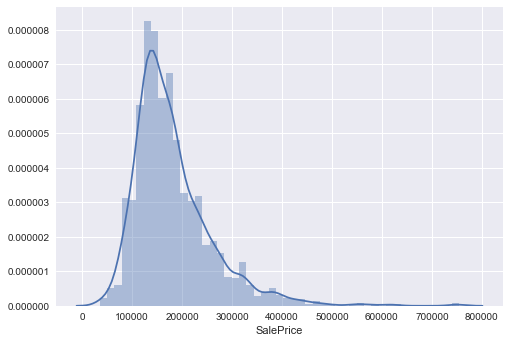

In [5]:
#Perform some EDA to look at the data
#Plot sales price by the count of sale price
g = sns.distplot(df_train['SalePrice'])
plt.show()

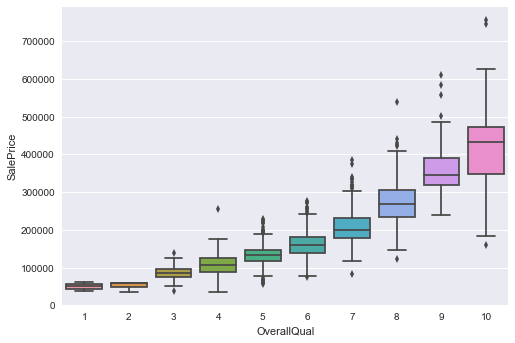

In [6]:
#Boxplot for overallqual
over_box = sns.boxplot(x='OverallQual', y='SalePrice', data=df_train)
plt.show()

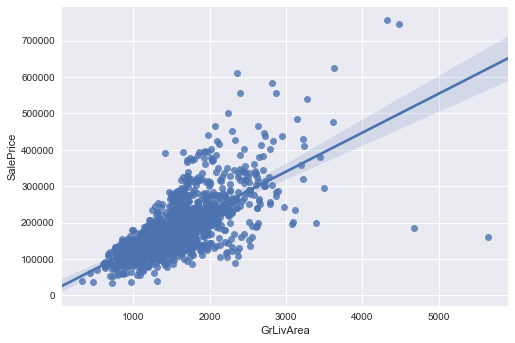

In [7]:
#Ground living area, as we see the higher the living area, the higher the saleprice
GrLivArea_box = sns.regplot(x='GrLivArea', y='SalePrice', data=df_train)
plt.show()
# Can drop the outliers in the bottom right

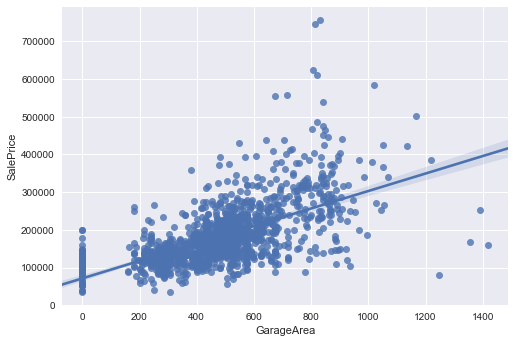

In [8]:
#Another great variable on contributing to buyers choice
GarageArea_box = sns.regplot(x='GarageArea', y='SalePrice', data=df_train)
plt.show()
#This looks like we can drop data points in the bottom right corner

## Looking at Missing Data

In [9]:
#Looking of Missing Value in train
all_data_NA = all_data.isnull()
all_data_nan = all_data_NA[all_data_NA == 1].count()
#Drop all columns that have no missing value 
all_data_NaN = all_data_nan[all_data_nan > 0]
all_data_NaN

Alley           2721
BsmtCond          82
BsmtExposure      82
BsmtFinSF1         1
BsmtFinSF2         1
BsmtFinType1      79
BsmtFinType2      80
BsmtFullBath       2
BsmtHalfBath       2
BsmtQual          81
BsmtUnfSF          1
Electrical         1
Exterior1st        1
Exterior2nd        1
Fence           2348
FireplaceQu     1420
Functional         2
GarageArea         1
GarageCars         1
GarageCond       159
GarageFinish     159
GarageQual       159
GarageType       157
GarageYrBlt      159
KitchenQual        1
LotFrontage      486
MSZoning           4
MasVnrArea        23
MasVnrType        24
MiscFeature     2814
PoolQC          2909
SaleType           1
TotalBsmtSF        1
Utilities          2
dtype: int64

## Dealing with missing data

In [10]:
#Dropping all variables that have more than 50% missing
all_data = all_data.drop('PoolQC', axis=1)
all_data = all_data.drop(['MiscFeature','Alley','Fence'], axis=1)

In [11]:
# Dropping variables that is not relevent to buying or is already represented by another variable
#Drop all variables that doesn't means anything for home buying
#Dropp 1st and 2ndflr sf, which both equals to grlivarea

all_data = all_data.drop(['1stFlrSF','2ndFlrSF'], axis =1)

# Drop all garage and keep only garageQual and garageArea
all_data = all_data.drop(['GarageYrBlt','GarageType','GarageFinish', 'GarageCond', 'GarageCars'],axis=1)
all_data['GarageQual'] = all_data['GarageQual'].fillna('None')

# Impute the LotFrontage with median by nieghborhood
all_data["LotFrontage"] = all_data.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median()))

#Fill fireplace with None for nan values
all_data['FireplaceQu'] = all_data["FireplaceQu"].fillna("None")

#Dropping all basement except from bsmtQual and fill it with None 
all_data = all_data.drop(['BsmtFinType1','BsmtFinType2','BsmtExposure', 'BsmtCond'],axis=1)
all_data['BsmtQual'] = all_data['BsmtQual'].fillna('None')

#Dealing with MasVnrType and Area drop it for now, doesn't seem too interesting of a variable as prediction
all_data = all_data.drop(['MasVnrType','MasVnrArea'],axis=1)

#Electrical 
all_data['Electrical'] = all_data['Electrical'].fillna(all_data['Electrical'].mode()[0])

In [12]:
#Impute the remaining ones with mean or mode
all_data['BsmtFinSF1'] = all_data['BsmtFinSF1'].fillna(all_data['BsmtFinSF1'].mean())

all_data['BsmtFinSF2'] = all_data['BsmtFinSF2'].fillna(0)

all_data['BsmtFullBath'] = all_data['BsmtFullBath'].fillna(0)

all_data['BsmtHalfBath'] = all_data['BsmtHalfBath'].fillna(0)

all_data['BsmtUnfSF'] = all_data['BsmtUnfSF'].fillna(all_data['BsmtUnfSF'].mean())

all_data['Exterior1st'] = all_data['Exterior1st'].fillna("MetalSd")

all_data['Exterior2nd'] = all_data['Exterior2nd'].fillna('VinylSd')

all_data['Functional'] = all_data['Functional'].fillna('Typ')

all_data['GarageArea'] = all_data['GarageArea'].fillna(all_data['GarageArea'].mean())

all_data['KitchenQual'] = all_data['KitchenQual'].fillna('Gd')

all_data['MSZoning'] = all_data['MSZoning'].fillna('RL')

all_data['SaleType'] = all_data['SaleType'].fillna('WD')

all_data['TotalBsmtSF'] = all_data['TotalBsmtSF'].fillna(all_data['TotalBsmtSF'].mean())

all_data['Utilities'] = all_data['Utilities'].fillna('AllPub')

In [13]:
#Looking of Missing Value in train
all_data_NA = all_data.isnull()
all_data_nan = all_data_NA[all_data_NA == 1].count()
#Drop all columns that have no missing value 
all_data_NaN = all_data_nan[all_data_nan > 0]
all_data_NaN

Series([], dtype: int64)

## Transforming variables

In [14]:
# #Transforming numerical variables
all_data['GrLivArea'] = np.log(all_data['GrLivArea'])

In [15]:
# Create Dummies for the rest of the categorical variables
all_data = pd.get_dummies(all_data)
all_data.shape

(2919, 235)

# Modeling

In [16]:
#Get new Train and Test dataset
train =all_data[:ntrain]
test= all_data[ntrain:]

# Creating X and Y 
# y = df_train['SalePrice']
# x = df_train.loc[:, df_train.columns != 'SalePrice']
test.shape

(1459, 235)

In [17]:
# Import modules for modeliing
from sklearn.model_selection import KFold, cross_val_score, train_test_split, GridSearchCV, cross_val_predict
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC, Ridge
from sklearn.kernel_ridge import KernelRidge
import xgboost as xgb
from sklearn.feature_selection import SelectFromModel, f_regression, RFE
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.metrics import mean_squared_error

## Feature Selection

In [18]:
# Using RFE perform feature selection on the dataset
# feature extraction
model = Lasso(alpha =10 ,random_state=4)
rfe = RFE(model, 15)
fit = rfe.fit(train, y_train)
print(fit.n_features_)
fit1 = fit.support_
print(fit.ranking_)

/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of ite

/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of ite

/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of ite

15
[145  67 131 134  21 155 141 170  38  23 120   1  60   1 168 108 116 149
 152  98 151  63  19 112 144  72 143 148 105 114  97  90 211 191  17  18
   1 196  70  65 124  95 186 100 192  29 119 107  48  57 133 206 200 215
 213  69   1 132 182  10 183 190 181 205 113  27 201 110 203 159   2  32
 106  75  62 216 193  26 153  54 169  11  80  89 195  81  66 167 177 101
 176 175 163 125 178 174  12  96 209  83  77 162  53 102 147 111  40  41
  74 212  39  13 117 160 158 127  68  71 189 140 128 202   1   3  20 139
 135  55 137 130 219  78 210 104   1 166  84 208 129 150 194  93   5   6
 165  85 156   4  44   1 121  94 122  25  58  79 142 185  24  46  92  22
  64  30 188 103  16  15  99   1  87 115 207 154 123 214 217  88 161 109
  14  31  51  33 180  35  42  73  43   1   1  37 179  59  86  28   1 146
   8 197  56 157   1 138   1 220 173  82 218   1 199  76 172 118  34   9
 164 187 126  91  47 184  49 204   1 198 136  52   7  61  50  45 171  36
 221]


In [19]:
feature_list = dict(zip(train.columns, fit1))

In [20]:
#Def function to iterate each key and print out matching input value
def find_key(input_dict, value):
    return {k for k, v in input_dict.items() if v == value}

In [21]:
#Looking into feature_list and select all thats true, Top 15 Feature selected
top_features = find_key(feature_list, True)
features = list(top_features)
features

['Neighborhood_StoneBr',
 'GrLivArea',
 'KitchenAbvGr',
 'SaleType_Con',
 'RoofMatl_WdShngl',
 'Functional_Sev',
 'Heating_OthW',
 'KitchenQual_Ex',
 'Condition2_PosN',
 'MSZoning_C (all)',
 'RoofMatl_Membran',
 'Neighborhood_NoRidge',
 'Neighborhood_NridgHt',
 'BsmtQual_Ex',
 'RoofMatl_ClyTile']

In [22]:
#Recreate new feature list call x_new and use that to predict all models 
x_new = train[features]
#Check shape to ensure it is only using the new x
train.head()

,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,EnclosedPorch,Fireplaces,FullBath,...,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,Street_Grvl,Street_Pave,Utilities_AllPub,Utilities_NoSeWa
0,0,3,706.0,0.0,1.0,0.0,150.0,0,0,2,...,0,0,0,0,0,1,0,1,1,0
1,0,3,978.0,0.0,0.0,1.0,284.0,0,1,2,...,0,0,0,0,0,1,0,1,1,0
2,0,3,486.0,0.0,1.0,0.0,434.0,0,1,2,...,0,0,0,0,0,1,0,1,1,0
3,0,3,216.0,0.0,1.0,0.0,540.0,272,1,1,...,0,0,0,0,0,1,0,1,1,0
4,0,4,655.0,0.0,1.0,0.0,490.0,0,1,2,...,0,0,0,0,0,1,0,1,1,0


## Creating Baseline Models

In [23]:
#Set up Ridge regression
ridge = Ridge(alpha = 100, normalize=True)

# Perform 5-fold cross validation
scores = cross_val_score(ridge, train[features], y_train, cv=5)

# Make cross validated predictions
CV_ridge_pred = cross_val_predict(ridge, train[features], y_train, cv=5)

# MSE for validation
rmse= np.sqrt(mean_squared_error(y_train,CV_ridge_pred))
rmse

78376.237132668102

In [24]:
# Lasso
lasso = make_pipeline(RobustScaler(), Lasso(alpha =10 ,random_state=4))

# Perform 5-fold cross validation
scores = cross_val_score(lasso, train[features], y_train, cv=5)

# Make cross validated predictions
CV_lasso_pred = cross_val_predict(lasso, train[features], y_train, cv=5)

# MSE for validation
MSE = mean_squared_error(y_train,CV_lasso_pred)
rmse = np.sqrt(mean_squared_error(y_train, CV_lasso_pred))
rmse

41633.833447268626

In [50]:
# ENEt
ENet = make_pipeline(RobustScaler(), ElasticNet(alpha=533, l1_ratio=.9, random_state=1))

# Perform 5-fold cross validation
scores = cross_val_score(ENet, train[features], y_train, cv=5)

# Make cross validated predictions
CV_ENet_pred = cross_val_predict(lasso, train[features], y_train, cv=5)

# MSE for validation
MSE = mean_squared_error(y_train,CV_lasso_pred)
rmse = np.sqrt(mean_squared_error(y_train, CV_lasso_pred))
rmse

41633.833447268626

In [36]:
#GBoost Model
GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,max_depth=4, max_features='sqrt',min_samples_leaf=15, min_samples_split=10, loss='huber', random_state =5)
# Perform 5-fold cross validation
scores = cross_val_score(GBoost, train[features], y_train, cv=5)

# Make cross validated predictions
CV_GBoost_pred = cross_val_predict(lasso, train[features], y_train, cv=5)

# MSE for validation
MSE = mean_squared_error(y_train,CV_lasso_pred)
rmse = np.sqrt(mean_squared_error(y_train, CV_lasso_pred))
rmse


41633.833447268626

In [27]:
#XGBoost
model_xgb = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, learning_rate=0.05, max_depth=3, min_child_weight=1.7817, n_estimators=2200,reg_alpha=0.4640, reg_lambda=0.8571,subsample=0.5213, silent=1, random_state =7, nthread = -1)
# Perform 5-fold cross validation
scores = cross_val_score(model_xgb, train[features], y_train, cv=5)

# Make cross validated predictions
CV_xgb_pred = cross_val_predict(lasso, train[features], y_train, cv=5)

# MSE for validation
MSE = mean_squared_error(y_train,CV_lasso_pred)
rmse = np.sqrt(mean_squared_error(y_train, CV_lasso_pred))
rmse

41633.833447268626

# Stacking Models

In [28]:
# Using a function to Stack base models with meta models through CV prediction of 5-fold in train data
class StackingAveragedModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, base_models, meta_model, n_folds=5):
        self.base_models = base_models
        self.meta_model = meta_model
        self.n_folds = n_folds
   
    # We again fit the data on clones of the original models
    def fit(self, X, y):
        self.base_models_ = [list() for x in self.base_models]
        self.meta_model_ = clone(self.meta_model)
        kfold = KFold(n_splits=self.n_folds, shuffle=True, random_state=156)
        
        # Train cloned base models then create out-of-fold predictions
        # that are needed to train the cloned meta-model
        out_of_fold_predictions = np.zeros((X.shape[0], len(self.base_models)))
        for i, model in enumerate(self.base_models):
            for train_index, holdout_index in kfold.split(X, y):
                instance = clone(model)
                self.base_models_[i].append(instance)
                instance.fit(X[train_index], y[train_index])
                y_pred = instance.predict(X[holdout_index])
                out_of_fold_predictions[holdout_index, i] = y_pred
                
        # Now train the cloned  meta-model using the out-of-fold predictions as new feature
        self.meta_model_.fit(out_of_fold_predictions, y)
        return self
   
    #Do the predictions of all base models on the test data and use the averaged predictions as 
    #meta-features for the final prediction which is done by the meta-model
    def predict(self, X):
        meta_features = np.column_stack([
            np.column_stack([model.predict(X) for model in base_models]).mean(axis=1)
            for base_models in self.base_models_ ])
        return self.meta_model_.predict(meta_features)

In [29]:
stacked_averaged_models = StackingAveragedModels(base_models = (ENet, GBoost,ridge, lasso), meta_model = model_xgb)

stacked_averaged_models.fit(x_new.values, y_train)
stacked_train_pred = stacked_averaged_models.predict(train[features].values)
stacked_pred = (stacked_averaged_models.predict(test[features].values))
print(mean_squared_error(y_train, stacked_train_pred))

1742643978.59


In [30]:
RMSE = np.sqrt(mean_squared_error(y_train, stacked_train_pred))
RMSE

41744.987466697523

In [31]:
final_pred = pd.DataFrame()
final_pred['Id'] = test_id
final_pred['SalePrice'] = stacked_pred
final_pred.to_csv('Competition#2_Final_Prediction.csv', index= False)

In [32]:
# model_xgb = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, learning_rate=0.05, max_depth=3, min_child_weight=1.7817, n_estimators=2200,reg_alpha=0.4640, reg_lambda=0.8571,subsample=0.5213, silent=1, random_state =7, nthread = -1)
# model_xgb.fit(x_model, y_train)
# y_xgb_pred = model_xgb.predict(test.values)
# y_xgb_pred.shape
stacked_pred.shape

(1459,)

In [33]:
# #Plot test and train sale price
# import seaborn as sns
# sns.set()

In [34]:
# train_price = pd.read_csv('train.csv')
# test_price = pd.read_csv('Competition#2_Test_results.csv')

In [35]:
# GrLivArea_box = sns.regplot(x='GrLivArea', y='SalePrice', data=train_price, label='train')
# test = sns.regplot(x='GrLivArea', y='SalePrice', data = test_price, label='test')
# plt.legend()
# plt.show()

## Prediction score
- on XGBoost model, the model prediction score is 0.82 R^2 
    - With CV the score is about .80 R^2
- This is with 15 predictors, Next we will see if another preprocessing with work better
- If the model selects the best 25 predictors the R^2 increases to .87 
- Using GridSearch, Selecting alpha as 10 is the best performing model. increasing the prediction score to .877 R^2 with 15 predictors